# Artificial Neural Networks as Universal Function Approximators

## Scaling Issues in Traditional Reinforcement Learning Methods


In reinforcement learning (RL) frameworks, algorithms such as Q-learning and Sarsa aim to approximate the theoretical action value function $q^*(a,s)$, which reflects the maximum expected reward an agent can receive by performing action $a$ from state $s$. The approximate value $Q(s,a)$ is typically stored in a table, as we have seen so far. Theoretically, an optimal solution is one where $Q(s,a)$ has converged to $q^*(a,s)$, but in practical scenarios, and in particular, to check our solutions, we often identify optimal performance with other metrics as well, for instance, by estimating how many actions are required to reach our goal without errors. These metrics allow us to test our code and identify whether an optimal performance, in the sense of solving the task with the minimum number of actions, has been discovered. 

The primary drawback of this methodology emerges as the complexity of the environment or the volume of possible states and actions becomes very large. To accommodate the increasing array of state-action pairs, the table holding the Q-values needs to expand correspondingly. Imagine a complex game like Go, Chess, and Backgammon. To store all the possible state-value combinations in a table would be impractical. In complex environments or environments with a continuous state space (where states are not discrete, such examples including motion in space), the need for an ever-expanding table results in computational inefficiency. Even for the simplest problems we can easily notice the increment of the table as a function of an increasing number of states.

# Exercise: Robot in a Linear Track
 
A robot is placed at the beginning of a linear track (state 0) and must navigate to a reward at the end of the track (state 5). The robot has two possible actions, "forward" and "backward". The track consists of 6 discrete states, numbered from 0 to 5. The objective is to use the Q-learning reinforcement learning algorithm to teach the robot to reach the reward in an optimal manner, which means taking the minimum number of steps.

**Objectives**:  
1. In the following template, implement the Q-learning algorithm.
2. Identify the minimum number of required steps to reach the reward. 
3. Identify the minimum number of episodes required for the robot to learn how to reach the reward using the minimum number of steps. 
4. Monitor and plot the number of steps the robot takes to reach the goal over episodes to observe a learning curve.
5. Expand the track to 30 states; which is now the optimal number of steps to reach the reward?
6. What is the total number of Q-values for the expanded track?
7. What is the necessary number of episodes for learning to reach the reward with the minimum number of steps in this extended track?
8. Plot the Q-value of the forward action as a function of the state - you can do this for one run.
9. Is there a difference between the number of epochs that the algorithm requires to correctly learn the reward values and the number of epochs to learn to go to the goal with the optimal number of steps

**Goals**:
The aim of the exercise is to revise key concepts by demonstrating that:
1. Correct learning reflects an optimal or near-optimal solution regarding the number of actions needed to reach one's goal.
2. The number of Q-values to be learned changes with a more difficult problem, and so does the time to learn.
3. Q-values are a function of the state-action pair, but we will isolate one action (forward in this case) to demonstrate this concept in one dimension.


**Note**:
We have highlighted the need for statistics. You will need to repeat the episodes for ten runs and observe average plots. You may plot the Q-values of one run or the average Q-values across runs. 



In [1]:
import numpy as np
import matplotlib.pyplot as plt

class LinearTrackEnvironment:
    def __init__(self, track_size):
        self.track_size = track_size
        self.actions=2
    
    def reset(self):
        self.state=0
        self.terminal=0
        return self.state, self.terminal

    def step(self, state, action):
        if action == 1:  # Move forward
            next_state = min(state + 1, self.track_size - 1)
        else:  # Move backward
            next_state = max(0, state - 1)
        reward = 1 if next_state == self.track_size - 1 else 0
        self.terminal= 1 if next_state == self.track_size - 1 else 0
        return next_state, reward, self.terminal

class LinearTrackAgent:
    def __init__(self, environment, epsilon=0.05, eta=0.1, gamma=0.99):
        self.env = environment
        self.epsilon = epsilon  # Exploration rate
        self.eta = eta      # Learning rate
        self.gamma = gamma  # Discount factor
        self.Q = np.zeros((self.env.track_size, self.env.actions))  # Initialize Q-values for each state and action (forward, backward)
        self.max_steps=0  #Initialise max numbers of steps allowed
        self.episodes=0   #Initialise number of episodes
        self.steps_per_episode = []  # Track the number of steps per episode

    def choose_action(self, state):
        pass

    def update_Q(self, state, action, reward, next_state):
        self.Q[state, action] += self.eta * (reward + self.gamma * np.max(self.Q[next_state]) - self.Q[state, action])

    def train(self, episodes=20, runs=100, max_steps=100):
        self.max_steps=max_steps
        self.episodes=episodes
        steps_run_episode = np.zeros((runs, episodes))  # Corrected the shape of the array
        for run in range(runs):
            self.Q = np.zeros((self.env.track_size, self.env.actions))  # Reinitialize Q-values for each run
            self.steps_per_episode = []  # Reset steps per episode for each run
            for episode in range(episodes):
                state, terminal = env.reset()       
                steps = 0  # Reset step count for the episode
                while not terminal and steps < self.max_steps:
                    # TO DO
                    pass
                steps_run_episode[run, episode] = steps
        return steps_run_episode, self.Q

    def plot_learning_progress(self, average_steps_per_episode, optimal_steps_per_episode):
          # TO DO
        plt.show()

# Initialize the agent with a track size of 6 states
states=6

env = LinearTrackEnvironment(track_size=6)
agent = LinearTrackAgent(environment=env)

# Train the agent over 20 episodes and 50 runs, then plot the learning progress



## Solution
The optimal number of steps is one less than the number of states, i.e., states - 1; this can be seen if we assume states = 2. We need one step to reach the goal, and we can generalise this to $n$ states by induction. 

The agent can learn optimal behaviour on the 6-state track in fewer than ten episodes, but the Q-values may not have yet converged, depending on the parameters. In this solution where a learning rate of 0.1 is used and the number of episodes is kept low, say 10 episodes, the Q-value of the state just before reward can be as low as 0.65. This is expected, since the learning rate controls the magnitude of the Q-value updates. If you increase the learning rate appropriately, or you increase the number of episodes to 30, you will notice that the Q-value of the penultimate state increases, and for 200 episodes it converges to 1, i.e., it no longer changes over time. A high learning rate would also help but result in a very noisy gradient update which will likely not work in difficult problems.

The Q-table has dimensions $[\mathbf{states \times actions}]$, so for six states and two actions, we have 12 Q-values. 

Similarly, the linear track with 30 states can learn the optimal policy in fewer than 40 epochs, but the Q-values may have not fully converged at that point. Correspondingly, we have 60 Q-values. 

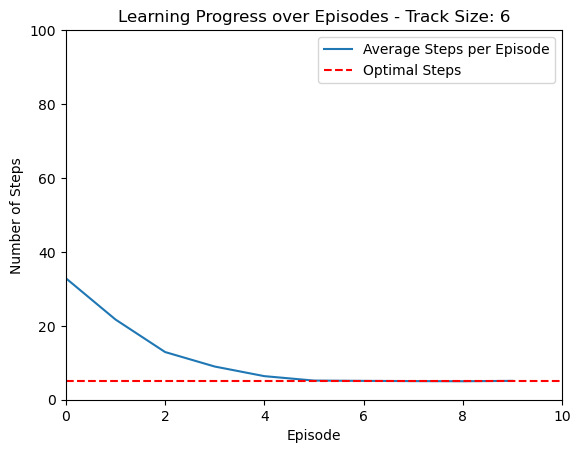

[0.000, 0.002, ]
[0.000, 0.012, ]
[0.000, 0.069, ]
[0.000, 0.261, ]
[0.000, 0.651, ]
[0.000, 0.000, ]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

class LinearTrackEnvironment:
    def __init__(self, track_size):
        self.track_size = track_size
        self.actions=2
    
    def reset(self):
        self.state=0
        self.terminal=0
        return self.state, self.terminal

    def step(self, state, action):
        if action == 1:  # Move forward
            next_state = min(state + 1, self.track_size - 1)
        else:  # Move backward
            next_state = max(0, state - 1)
        reward = 1 if next_state == self.track_size - 1 else 0
        self.terminal= 1 if next_state == self.track_size - 1 else 0
        return next_state, reward, self.terminal

class LinearTrackAgent:
    def __init__(self, environment, epsilon=0.05, eta=0.1, gamma=0.99):
        self.env = environment
        self.epsilon = epsilon  # Exploration rate
        self.eta = eta      # Learning rate
        self.gamma = gamma  # Discount factor
        self.Q = np.zeros((self.env.track_size, self.env.actions))  # Initialize Q-values for each state and action (forward, backward)
        self.max_steps=0  #Initialise max numbers of steps allowed
        self.episodes=0   #Initialise number of episodes
        self.steps_per_episode = []  # Track the number of steps per episode

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            action= np.random.choice([0, 1])  # Explore
        else:
            # Handle case where Q-values are the same by randomly choosing among the best actions
            max_q = np.max(self.Q[state])
            action=np.random.choice(np.where(self.Q[state] == max_q)[0])
        return action

    def update_Q(self, state, action, reward, next_state):
        self.Q[state, action] += self.eta * (reward + self.gamma * np.max(self.Q[next_state]) - self.Q[state, action])

    def train(self, episodes=20, runs=100, max_steps=100):
        self.max_steps=max_steps
        self.episodes=episodes
        steps_run_episode = np.zeros((runs, episodes))  # Corrected the shape of the array
        for run in range(runs):
            self.Q = np.zeros((self.env.track_size, self.env.actions))  # Reinitialize Q-values for each run
            self.steps_per_episode = []  # Reset steps per episode for each run
            for episode in range(episodes):
                state, terminal = env.reset()       
                steps = 0  # Reset step count for the episode
                while not terminal and steps < self.max_steps:
                    action = self.choose_action(state)
                    next_state, reward, terminal = self.env.step(state, action)
                    self.update_Q(state, action, reward, next_state)
                    state = next_state
                    steps += 1  # Increment step count
                steps_run_episode[run, episode] = steps
        return steps_run_episode, self.Q

    def plot_learning_progress(self, average_steps_per_episode, optimal_steps_per_episode):
        plt.plot(average_steps_per_episode, label='Average Steps per Episode')
        plt.axhline(y=optimal_steps_per_episode, color='r', linestyle='--', label='Optimal Steps')
        plt.title('Learning Progress over Episodes - Track Size: ' + str(self.env.track_size))
        plt.xlabel('Episode')
        plt.ylabel('Number of Steps')
        plt.xlim(0, self.episodes)  # Set the y-axis limits
        plt.ylim(0, self.max_steps)  # Set the y-axis limits
        plt.legend()
        plt.show()

# Initialize the agent with a track size of 6 states
states=6
epsilon=0.01
eta=0.1
gamma=0.99
optimal_steps_per_episode=states-1
max_steps=100 #if you increase the number of states you may also ineed to increase the number of steps to learn
episodes=10
runs=50

env = LinearTrackEnvironment(track_size=states)
agent = LinearTrackAgent(environment=env, epsilon=epsilon, eta=eta, gamma=gamma)

# Train the agent over 100 episodes and 10 runs, then plot the learning progress
steps_run_episode, Q_values = agent.train(episodes=episodes, runs=runs, max_steps=max_steps)
average_steps_per_episode = np.mean(steps_run_episode, axis=0)  # Calculate the average across runs
agent.plot_learning_progress(average_steps_per_episode,optimal_steps_per_episode)

Q_values

for row in Q_values:
    print('[', end='')
    for value in row:
        print("{:.3f}".format(value), end=', ')
    print(']')


## Approximating the Q-value Function with an Artificial Neural Network

We have previously identified a limitation with storing Q-values in a tabular form. We have also noted that Q-values are, in fact, a function of states and actions. To enhance generalisability, we seek to replace the traditional table with a structure capable of learning this function, one that suffers less from scaling issues than a table does. Here, Artificial Neural Networks (ANNs) offer a promising solution. ANNs, mathematical constructs inspired by the neural architecture of the brain, are capable of approximating functions by learning from samples of input and output data.

We also noted in the example of the linear track that by increasing its size, learning slows down as a direct consequence of the increased number of states-action pairs, given that the algorithm propagates information about reward among consecutive states. In the, perhaps, over-simplified example of the track, this problem appears to have a direct remedy, the implementation of an eligibility trace, which because of the simplicity and the unidimensional nature of the problem would indeed be a solution. For the same simple problem, in 2D however, eligibility traces would help but would not solve the scaling issue. A neural network, because it learns to approximate functions, could help, provided that we have designed the state representation in such a way that allows generalisation. To give an example, the simpler state representation in the linear track, or in its 2D generalisation of a grid space, would be a vector (or a matrix) representing the states with 0s everywhere apart from the location of the agent that would be, for instance, 1. One example representation that allows for generalisation would mark also the neighbouring grids of the agent location with a smaller number, e.g., 0.25. Because there is continuity in the space, we expect that neighbouring states require similar actions. By allowing neighbouring states to learn as well as the current state, we improve performance. This generalisation can be best implemented using a neural network, as a function approximator.

In the forthcoming discussion, we will begin by defining a single neuron and its parameters, commonly termed as the weights. We will explore how to adjust these weights to learn functions, applying optimisation principles previously discussed. Subsequent to this foundation, our next session will merge the domains of Reinforcement Learning (RL) and ANNs by substituting the Q-value table with an Artificial Neural Network.


### Neuron

A neuron, within the context of artificial neural networks, can be conceptualised as a fundamental processing unit, inspired by the behaviour of biological neurons. This artificial neuron receives inputs from multiple sources, combines them in a weighted sum, and then applies an activation function to this sum to produce an output. Mathematically, if we denote $w_{i,j}$ as the weight from neuron $j$ to neuron $i$, and $x_j$ as the input from neuron $j$, the output $y_i$ of the neuron can be expressed as:

$$
y_i = f\left(\sum_{j}w_{ij} \cdot x_j + b_i\right)
$$

where $f$ represents the activation function and $b_i$ is the bias term for neuron $i$.

A single neuron is also known as a perceptron when specifically referring to a single-layer neural network that uses a step function as its activation. The operation of a single neuron can be paralleled with the mathematical equation of a straight line, $y = ax + b$, where $y$ represents the output, $x$ the input, $a$ the weight (slope), and $b$ the bias (intercept). This analogy provides insight into why a single neuron alone is only capable of approximating linear functions effectively, or solving "linearly separable problems". Linear separability implies that inputs are coming from distinct sets and these sets can be separated by lines or hyperplanes.

Consider, for instance, the logical OR gate, which is a function of two inputs resulting in one output. Representing this function on a 3D plot, with one input on the x-axis and the other input on the y-axis, we can observe that by drawing a hyperplane, it is possible to separate 0s from 1s.


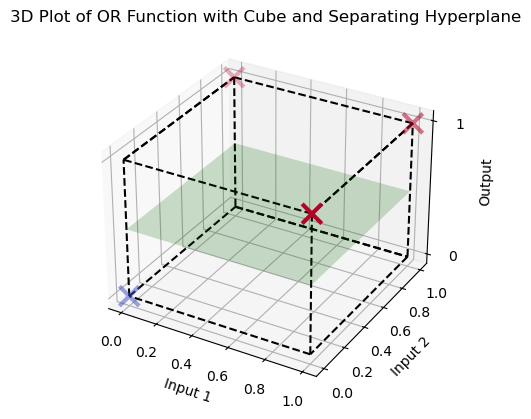

In [3]:
# Define original OR function inputs and outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([0, 1, 1, 1])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the inputs with outputs as the z-axis 
ax.scatter(inputs[:, 0], inputs[:, 1], outputs, c=outputs, cmap='coolwarm', s=200, marker='x', linewidth=3)

# Draw a cube to encapsulate the points for clearer visualization
# Define the edges of the cube
edges = [[0, 0, 0], [0, 1, 0], [1, 1, 0], [1, 0, 0], [0, 0, 0],
         [0, 0, 1], [0, 1, 1], [1, 1, 1], [1, 0, 1], [0, 0, 1],
         [0, 1, 1], [0, 1, 0], [1, 1, 0], [1, 1, 1], [1, 0, 1], [1, 0, 0]]
edges = np.array(edges)

# Plot the edges of the cube
for start, end in zip(edges, edges[1:]):
    ax.plot3D(*zip(start, end), color="black", linestyle='--')

# Add the green hyperplane for separability
xx, yy = np.meshgrid(range(2), range(2))
zz = 0.5 * np.ones_like(xx)  # Define the plane at z = 0.5

# Plot the separating hyperplane
ax.plot_surface(xx, yy, zz, alpha=0.2, color='green')

# Label axes
ax.set_xlabel('Input 1')
ax.set_ylabel('Input 2')
ax.set_zlabel('Output')
ax.set_title('3D Plot of OR Function with Cube and Separating Hyperplane')

# Set ticks for z-axis
ax.set_zticks([0, 1])

plt.show()


### Derivation of the Backpropagation Algorithm for a one layer ANN.

We aim to "train" a neuron to reproduce a function $\mathbf{y^*}(\mathbf{x})$ that captures the true relationship between inputs and outputs within a given domain. In general $\mathbf{y^*}$ is multidimensional, we use the subscript $i$ to focus on one of its dimensions $y^*_i(\mathbf{x})$.

The training methodology stems from principles of optimisation. We have collected $n$ samples $\mathbf{x}$ from the input domain and their corresponding values $y_i^t(\mathbf{x})$, where the superscript $t$ denotes "true" or "target". These pairs form our training dataset.

To learn such a function we will require as many outputs neurons as the dimention of  $\mathbf{y^*}(\mathbf{x})$. The objective is for the neuron's output $y_i$ when presented with $\mathbf{x}$, to closely match $y^*_i(\mathbf{x})$. Accurate predictions for unseen samples require that the training data adequately cover the space of $\mathbf{x}$.

We define an error function as:

$$
E = \frac{1}{2n} \sum_i \sum_{\mathbf{x}} \left( y_i^t(\mathbf{x}) - y_i(\mathbf{x}; \mathbf{W}) \right)^2,
$$

where $y_i^t(\mathbf{x})$ is the target output for the input $\mathbf{x}$, $n$ the number of samples $\mathbf{x}$, and $y_i(\mathbf{x}; \mathbf{W})$ represents the neuron's output for $\mathbf{x}$ given the weights $\mathbf{W}$. The symbol $\sum_{\mathbf{x}}$ declares that we are summing the quantities for all $\mathbf{x}$, and the symbol $\sum_i $ that we are summing the error of all output neurons. This error function is also known as `mean square error` (MSE). By minimizing the MSE, we aim for the neuron to approximate the underlying function $g(\mathbf{x})$ with its output.

For weight updates, we apply the gradient descent method:

$$
\Delta w_{ij} = - \eta \frac{\partial E}{\partial w_{ij}},
$$

where $\eta$ is the learning rate, a typically small positive value facilitating incremental weight adjustments.

The neuron's output $y_i$ is calculated as:

$$
y_i(\mathbf{x}) = f\left(\sum_j w_{ij} x_j + b_i\right),
$$

assuming a sigmoid activation function $f(x) = \frac{1}{1+e^{-x}}$, known for its property $f'(x) = f(x)(1 - f(x))$.

To compute $\frac{\partial E}{\partial w_{ij}}$ for the neuron using the chain rule, we first replace the symbol $E$ with the specific error function and then take the derivative. This strategy avoids making a number of mistakes by applying the chain rule without considering the dependencies of the variables. We then have:

$$
\frac{\partial E}{\partial w_{ij}} = - \frac{1}{n} \sum_{\mathbf{x}} \left(y_i^t(\mathbf{x}) - y_i(\mathbf{x})\right) \frac{\partial y_i(\mathbf{x})}{\partial w_{ij}},
$$

where the derivative $\frac{\partial y_i(\mathbf{x})}{\partial w_{ij}}$ accounts for the impact of the weight $w_{ij}$ on the neuron's output. The $\sum_i$ drops because the weight $w_{ij}$ affects only the output neuron $i$. Given the sigmoid activation, this results in:

$$
\frac{\partial y_i(\mathbf{x})}{\partial w_{ij}} = y_i(\mathbf{x})(1 - y_i(\mathbf{x}))x_j.
$$

Thus, the weight update rule becomes:

$$
\Delta w_{ij} = \eta~\frac{1}{n} \sum_{\mathbf{x}} \left(y_i^t(\mathbf{x})- y_i(\mathbf{x})\right) y_i(\mathbf{x})(1 - y_i(\mathbf{x})) x_j.
$$


or by swapping the order of the quantities in the first parenthesis we end up with an equivalent form:

$$
\Delta w_{ij} = - \eta~\frac{1}{n} \sum_{\mathbf{x}} \left(y_i(\mathbf{x})-y_i^t(\mathbf{x})\right) y_i(\mathbf{x})(1 - y_i(\mathbf{x})) x_j.
$$

We can derive the same form of update rule for the bias, if we consider that it is a special weight with an input constantly set to 1. The bias only needs one index to be defined that of the neuron. We will then conclude:

$$
\Delta b_{i} = - \eta~\frac{1}{n} \sum_{\mathbf{x}} \left(y_i(\mathbf{x})-y_i^t(\mathbf{x})\right) y_i(\mathbf{x})(1 - y_i(\mathbf{x})).
$$

To ensure the function is appropriately learned, i.e., it can generalise to achieve good performance with unseen data, we utilise additional samples to form a test set. This test set should **not** have been used in any capacity to tune the model.

A single pass of the training dataset will rarely lead to learning. An **epoch** refers to a single pass of the entire training dataset through the learning algorithm. We typically repeat this process for a number of epochs while monitoring how the error on the training data decreases. An epoch ends when the entire dataset has been used once to update the model parameters.

# Exercise

Given a single neuron model, derive the backpropagation update rule using a Rectified Linear Unit (ReLU) activation function. The ReLU function is defined as $f(h) = \max(0, h)$, where $h$ is the input to the neuron. Assume the error function is as previously defined:  
$$E = \frac{1}{2n} \sum_{i} \sum_{\mathbf{x}} \left( y_i^t(\mathbf{x}) - y_i(\mathbf{x}; \mathbf{W}) \right)^2,$$ 

where $y_i^t(\mathbf{x})$ represents the target output for input $\mathbf{x}$, and $y_i(\mathbf{x}; \mathbf{W})$ is the output of the neuron.

You will end up with the foillowing updates:
$$
\Delta w_{ij} = \eta~\frac{1}{n}  \sum_{\mathbf{x}} \left(y_i^t(\mathbf{x}) - y_i(\mathbf{x})\right) \cdot \text{ReLU}'\left(\sum_j w_{ij} x_j + b_i \right) \cdot x_j,
$$

and

$$
\Delta b_{i} = \eta~\frac{1}{n}\sum_{\mathbf{x}} \left(y_i^t(\mathbf{x}) - y_i(\mathbf{x})\right) \cdot \text{ReLU}'\left(\sum_j w_{ij} x_j + b_i )\right),
$$

where $\text{ReLU}'(\cdot)$ denotes ReLU's derivative with respect to its input.

These can be written more elegantly if we define as:

$$\delta_i=  \left(y_i^t(\mathbf{x}) - y_i(\mathbf{x})\right) \cdot \text{ReLU}'\left(\sum_j w_{ij} x_j + b_i)\right) $$

then:

$$
\Delta w_{ij} = \eta~\frac{1}{n}\sum_{\mathbf{x}} \delta_i \cdot x_j,
$$


$$
\Delta b_{i} = \eta~\frac{1}{n}\sum_{\mathbf{x}} \delta_i ,
$$

## Solution

The error function is defined as:
$$
E = \frac{1}{2n} \sum_{i} \sum_{\mathbf{x}} \left( y_i^t(\mathbf{x}) - y_i(\mathbf{x}; \mathbf{W}) \right)^2,
$$
where $y_i^t(\mathbf{x})$ is the target output for input $\mathbf{x}$, $n$ the number of samples $\mathbf{x}$, and $y_i(\mathbf{x}; \mathbf{W})$ denotes the neuron's output for $\mathbf{x}$ with weight $\mathbf{W}$. Minimizing this error aims to make the neuron approximate the function $g(\mathbf{x})$.

#### Weight Update via Gradient Descent
The gradient descent method updates weights as follows:
$$
\Delta w_{ij} = -\eta \frac{\partial E}{\partial w_{ij}},
$$
with $\eta$ being the learning rate, facilitating incremental adjustments.

#### Neuron Output with ReLU Activation
With a ReLU activation function, $f(h) = \max(0, h)$, the neuron's output is:
$$
y_i(\mathbf{x}) = \max(0, \sum_j w_{ij} x_j + b_i).
$$

#### Derivative for ReLU Activation
The partial derivative of the error $E$ with respect to a weight $w_{ij}$ involves:
$$
\frac{\partial E}{\partial w_{ij}} = - \frac{1}{n} \sum_{\mathbf{x}} \left(y_i^t(\mathbf{x}) - y_i(\mathbf{x})\right) \frac{\partial y_i(\mathbf{x})}{\partial w_{ij}},
$$
where $\frac{\partial y_i(\mathbf{x})}{\partial w_{ij}}$ is determined by the ReLU's gradient. 

We remind that the ReLU function is piecewise linear:

$$
ReLU(h) = \begin{cases} 
h & \text{if } h > 0 \\
0 & \text{otherwise} 
\end{cases}.
$$

Taking the derivatives in the two parts separately (1 if $h>0$ and 0 elsewhere) we note there is a discontinuity at $h=0$ where there is a jump from 0 to 1. But for practical implementations we assume can define the derivative of ReLU as follows:

$$
ReLU'(h) = \begin{cases} 
1 & \text{if } h > 0 \\
0 & \text{otherwise} 
\end{cases}.
$$

Thus, incorporating ReLU's derivative we end up with:
$$
\frac{\partial y_i(\mathbf{x})}{\partial w_{ij}} = \begin{cases} 
x_j & \text{if } \sum_j w_{ij} x_j + b_i > 0 \\
0 & \text{otherwise} 
\end{cases}.
$$

#### Simplified Weight Update Rule for ReLU
The weight update rule simplifies to:
$$
\Delta w_{ij} = \eta~\frac{1}{n}\sum_{\mathbf{x}} \left(y_i^t(\mathbf{x}) - y_i(\mathbf{x})\right) \cdot \text{ReLU}'\left(\sum_j w_{ij} x_j + b_i \right) \cdot x_j,
$$
where $\text{ReLU}'(\cdot)$ denotes ReLU's derivative with respect to its input.

Similarily for the biases:

$$
\Delta b_{i} = \eta~\frac{1}{n}\sum_{\mathbf{x}} \left(y_i^t(\mathbf{x}) - y_i(\mathbf{x})\right) \cdot \text{ReLU}'\left(\sum_j w_{ij} x_j + b_i )\right).
$$

To validate the learned function's appropriateness, i.e., its generalization capability to unseen data, additional samples are collected to form a test set, strictly not used during the tuning of the model.


### Efficient Implementation of the ANN update rules

Let's revisit the neuron equation:
$$
y_i(\mathbf{x}) = f\left(\sum_j w_{ij} x_j + b_i\right)
$$

Programming this directly as written would be inefficient due to the need to loop through the summation term $\sum_j w_{ij} x_j$ for each neuron $i$. To enhance efficiency, we express the computation in matrix form and utilise NumPy's efficient matrix operations.

In this context, **batch size** (`batch_size`) refers to the amount of data over which we train in one iteration. Typically, we select a "batch" from the training data to calculate one update to the weights of the neuron(s), and then proceed to the next batch for another update, and so on. For small datasets, however, the **batch size** can be the size of the training set.  

The **input dimension** (`input_dim`) denotes the dimension of $\mathbf{x}$, also known as the number of features in machine learning terminology.

The **output dimension** (`output_dim`) indicates the number of neurons in the layer or the number of output variables the model is designed to predict.

**Matrix Dimensions:**
1. **Input Matrix $\mathbf{X}$**:
   - Dimensions: (`batch_size`, `input_dim`)
   - Represents: Each row represents a sample, each column a feature.

2. **Weight Matrix $\mathbf{W}$**:
   - Dimensions: (`input_dim`, `output_dim`)
   - Represents: Each column represents weights connecting input features to a neuron.
  
3. **Bias $\mathbf{b}$**:
   - Dimensions: (`output_dim`,)
   - Represents: An additional ''weight' to each neuron corresponding ti an input permenently set to 1

### Code Snippet:
```python
import numpy as np

# Define input data (X), weights (W), and bias (b)
X = ...  # Input data matrix, shape (batch_size, input_dim)
W = ...  # Weight matrix, shape (input_dim, output_dim)
b = ...  # Bias vector, shape (output_dim,)

# Compute the linear transformation using matrix multiplication
linear_output = np.matmul(X, W) + b  # Alternatively, use the '@' operator: linear_output = X @ W + B

# Apply activation function element-wise
y_i = activation_function(linear_output)





Similarly, the update rules:

$$
\Delta w_{ij} =- \eta~\frac{1}{n} \frac{\partial E}{\partial w_{ij}}= - \eta~\frac{1}{n}  \sum_{\mathbf{x}} \left(y_i(\mathbf{x}) -y_i^t(\mathbf{x})\right) y_i(\mathbf{x})(1 - y_i(\mathbf{x})) x_j, 
$$

$$
\Delta b_{i} = - \eta~\frac{1}{n} \sum_{\mathbf{x}} \left(y_i(\mathbf{x})-y_i^t(\mathbf{x})\right) y_i(\mathbf{x})(1 - y_i(\mathbf{x}))
$$

are more efficiently implemented using matrix operations as follows.

### Code Snippet:
```python
import numpy as np

# Placeholder definitions for demonstration
X = ...  # Input data matrix, shape (batch_size, input_dim)
y_t = ...  # Target values matrix, shape (batch_size, output_dim)
y = ...  # Computed outputs matrix, shape (batch_size, output_dim)
W = ...  # Weight matrix, shape (input_dim, output_dim)
b = ...  # Bias vector, shape (output_dim,)
learning_rate = ...  # Learning rate, a scalar

# Compute the error term
error_term = y - y_t  # Element-wise difference between computed outputs and target values

# Assuming an activation function and computing its derivative
# Note: This should be adjusted based on the actual activation function used
activation_derivative = y * (1 - y)  # Derivative for sigmoid activation function

# Element-wise multiplication of the error term and activation derivative
error_times_derivative = error_term * activation_derivative

# Compute updates for weights
# Use matrix multiplication to aggregate contributions from all samples for each weight
update_weights = -learning_rate * np.matmul(X.T, error_times_derivative) / X.shape[0]

# Compute updates for biases
# Sum over the batch dimension (axis=0) to get individual updates for each output neuron - in case there are more than one
update_biases = -learning_rate * np.sum(error_times_derivative, axis=0) / X.shape[0]

# Apply the updates to weights and biases
W += update_weights
b += update_biases

### Training, Validation, and Testing

We previously highlighted the necessity of a separate test set. This separation is crucial because our training data might not capture the input distribution comprehensively, which could hinder our model's ability to generalize to unseen data. To simulate the experience of encountering unseen data, we reserve a portion of our input samples solely for testing purposes. Using these samples in the training and tuning processes would compromise their role as a stand-in for future, unseen data. The primary aim with the training data is to minimize error; however, without a dedicated testing set, we face the risk of developing a network that has simply memorized the data without genuinely understanding the underlying relationships between inputs and outputs— a condition known as overfitting.

Given the potential for both fortunate and unfortunate data splits between training and testing, particularly with limited data, reshuffling and resplitting the data are advisable strategies. Employing cross-validation techniques can significantly enhance the robustness of model evaluation and its generalisability. Cross-validation partitions the data into multiple subsets, systematically using some for training and others for validation across a series of cycles. The k-fold cross-validation method, for instance, divides the training data into k equally sized subsets. In this setup, in each cycle one of the subsets is used as a validation set, while the remaining subsets are combined to form the training set. This process repeats k times, with each subset serving as the validation set exactly once. The average performance across these cycles provides a comprehensive estimate of model performance, helping to mitigate the risk of overfitting and ensuring efficient use of data.

It's important to note that cross-validation is utilized during the model selection and hyperparameter tuning phase, leveraging the training data. The separate test set, however, remains untouched during this phase and is used only after the model has been finalized. This ensures an unbiased evaluation of the model's performance on completely unseen data. In instances where the test set may not fully represent the complexity of real-world scenarios, or if there's concern about its representativeness due to its composition or size, it might be sensible to reconsider the data splitting process. This entails reshuffling the entire dataset to create new training and test sets, followed by a repeat of the model training, cross-validation, and testing sequence. 


# Exercise: Noisy OR function

This exercise aims to apply the concepts we have seen so far to a simple function, the noisy OR. While the OR function is fundamentally simple, real-world scenarios often complicate such clear-cut functions with noise. Noise in the inputs and outputs simulates the imperfect data encountered in practical applications, challenging models to learn underlying patterns despite data variability. A single neuron can adapt to learn a Noisy OR function, as long as the noise levels maintain the linear separability of the inputs.

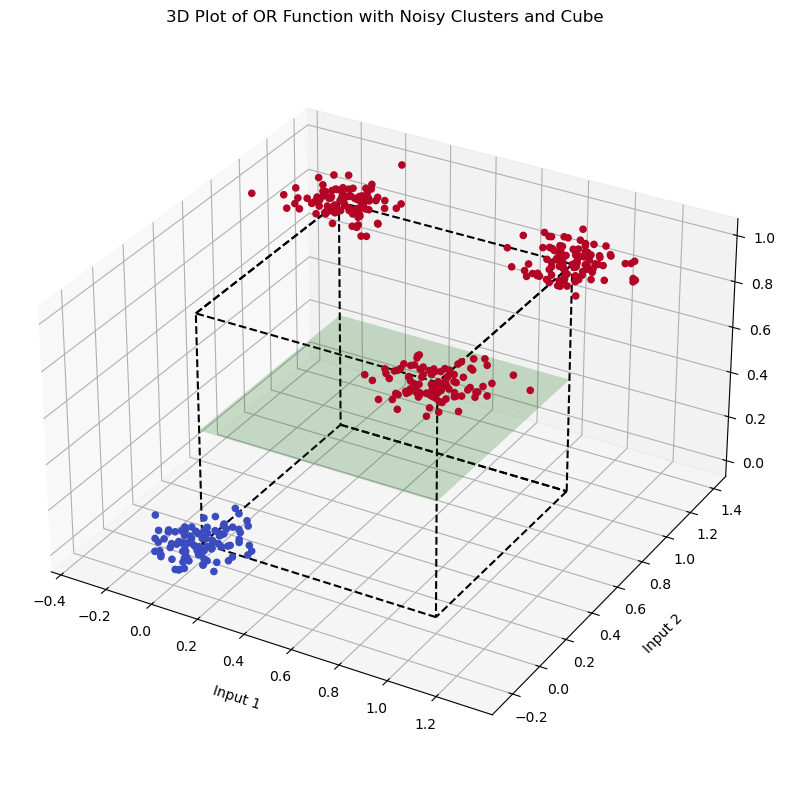

In [4]:
# Define original OR function inputs and outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([0, 1, 1, 1])

# Generate noisy data around the original OR function outputs to form clusters
np.random.seed(42)  # For reproducibility

# Define the number of noisy points per original point
num_noisy_points = 100

# Initialize arrays to hold noisy inputs and outputs
noisy_inputs = []
noisy_outputs = []

# Generate noisy data around each of the original OR function points
for input_point, output_point in zip(inputs, outputs):
    # Generate noisy inputs around the current point
    noisy_inputs.append(input_point + np.random.normal(0, 0.1, size=(num_noisy_points, 2)))
    # Generate noisy outputs around the current output (0 or 1)
    noisy_outputs.append(np.ones(num_noisy_points) * output_point)

# Convert the lists of arrays into single numpy arrays
noisy_inputs = np.concatenate(noisy_inputs)
noisy_outputs = np.concatenate(noisy_outputs)

# Recreate the 3D plot with the noisy data and include the cube for better visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the noisy data
ax.scatter(noisy_inputs[:, 0], noisy_inputs[:, 1], noisy_outputs, c=noisy_outputs, cmap='coolwarm', s=20, depthshade=False)

# Draw a cube to encapsulate the points for clearer visualization
edges = [[0, 0, 0], [0, 1, 0], [1, 1, 0], [1, 0, 0], [0, 0, 0],
         [0, 0, 1], [0, 1, 1], [1, 1, 1], [1, 0, 1], [0, 0, 1],
         [0, 1, 1], [0, 1, 0], [1, 1, 0], [1, 1, 1], [1, 0, 1], [1, 0, 0]]
edges = np.array(edges)

# Plot the edges of the cube
for start, end in zip(edges, edges[1:]):
    ax.plot3D(*zip(start, end), color="black", linestyle='--')

# Add the green hyperplane for separability
xx, yy = np.meshgrid(range(2), range(2))
zz = 0.5 * np.ones_like(xx)  # Define the plane at z = 0.5 for visualization

ax.set_box_aspect([1,1,0.6])  #  aspect ratio

# Plot the separating hyperplane
ax.plot_surface(xx, yy, zz, alpha=0.2, color='green')

# Label axes
ax.set_xlabel('Input 1', labelpad=10)
ax.set_ylabel('Input 2', labelpad=10)
ax.set_zlabel('Output (Noisy)', labelpad=10)
ax.set_title('3D Plot of OR Function with Noisy Clusters and Cube')

# Set ticks for z-axis
plt.tight_layout()
plt.show()



**Objective:** This exercise aims to introduce the practical aspects of training a neural network by developing a single neuron model to learn the OR function in the presence of noise. By handling a Noisy OR dataset, you will navigate through generating training, validation, and test datasets, conducting model training, tuning hyperparameters, and evaluating model performance on unseen data.


**Tasks:**

1. **Noisy OR Data Generation:** A function to generate a Noisy OR dataset will be provided. This function simulates real-world imperfections by adding Gaussian noise to the binary inputs and the deterministic outputs of the traditional OR function. Your task is to use this function to create three distinct datasets: a training set for model fitting, a validation set for tuning hyperparameters and iterative evaluation during training, and a test set for final performance assessment.

2. **Model Implementation:** Define a single neuron model with an activation function suitable for binary classification. Consider the characteristics of the OR function and the implications of noise when choosing the activation function.

3. **Training the Model:** Employ the training dataset to adjust the model's weights using a gradient descent algorithm. This step involves calculating the error between the model's predictions and the actual outputs, then using this error to update the model's parameters, for a number of epochs.

4. **Validation and Hyperparameter Tuning:** Utilise the validation dataset to monitor the model's performance throughout the training process. This phase is crucial for adjusting hyperparameters, such as the learning rate, to enhance the model's accuracy and generalization capability. Hyperparameters play a pivotal role in model training but are not learned directly from the data. Instead, they are set before training and adjusted based on performance metrics.

5. **Model Evaluation:** After fine-tuning the model with the training and validation sets, assess its generalization ability using the test dataset. This evaluation, conducted with frozen model weights, provides insight into the model's effectiveness in handling unseen data, thereby addressing overfitting concerns.

**Note:**

Because of the binary nature of the problem, you could consider a neuronal output greater than 0.5 as 1, and 0 otherwise. Use a sigmoid function.


In [5]:
# Task 1: Noisy OR Data Generation
def generate_noisy_or_data(samples, noise_level=0.1):
    # Generate binary inputs
    x = np.random.randint(2, size=(samples, 2))
    # OR function
    y = np.bitwise_or(x[:, 0], x[:, 1]).reshape(-1, 1)
    # Add Gaussian noise
    x_noisy = x + np.random.normal(0, noise_level, x.shape)
    y_noisy = y + np.random.normal(0, noise_level, y.shape)
    return x_noisy, y_noisy


# Generate datasets
training_data = generate_noisy_or_data(1000)
validation_data = generate_noisy_or_data(200)
test_data = generate_noisy_or_data(200)

# Define the SingleNeuronModel class with np.matmul for matrix multiplication
class SingleNeuronModel:
    def __init__(self, input_dim, output_dim):
        self.W = np.random.randn(input_dim, output_dim) * 0.01
        self.b = np.zeros((output_dim,))
    
    def activation(self, h):
        return 1 / (1 + np.exp(-h))
    
    def output(self, X):
        # Use np.matmul for matrix multiplication
        pass
    
    def train(self, X, y_t, learning_rate, epochs):
        for epoch in range(epochs):
            pass
        pass
          

# Evaluate the model's performance
def evaluate_model(model, data):
    pass
     

# Instantiate and train the model
model = SingleNeuronModel(2, 1)  # OR function: 2 inputs, 1 output
model.train(training_data[0], training_data[1], learning_rate=0.1, epochs=1000)

# Evaluate the revised model
validation_accuracy = evaluate_model(model, test_data)
print(" Model Validation Accuracy: {validation_accuracy_}")

# Evaluate the revised model - you only do this after finishing with your model
#test_accuracy = evaluate_model(model, test_data)
#print(" Model Test Accuracy: {test_accuracy_}")


 Model Validation Accuracy: {validation_accuracy_}


## Solution

In [6]:
# Task 1: Noisy OR Data Generation
def generate_noisy_or_data(samples, noise_level=0.1):
    # Generate binary inputs
    x = np.random.randint(2, size=(samples, 2))
    # OR function
    y = np.bitwise_or(x[:, 0], x[:, 1]).reshape(-1, 1)
    # Add Gaussian noise
    x_noisy = x + np.random.normal(0, noise_level, x.shape)
    y_noisy = y + np.random.normal(0, noise_level, y.shape)
    return x_noisy, y_noisy

# Generate datasets
training_data = generate_noisy_or_data(2000)
validation_data = generate_noisy_or_data(300)
test_data = generate_noisy_or_data(300)

# Define the SingleNeuronModel class with np.matmul for matrix multiplication
class SingleNeuronModel:
    def __init__(self, input_dim, output_dim):
        self.W = np.random.randn(input_dim, output_dim) * 0.01
        self.b = np.zeros((output_dim,))
    
    def activation(self, h):
        return 1 / (1 + np.exp(-h))
    
    def output(self, X):
        # Use np.matmul for matrix multiplication
        linear_output = np.matmul(X, self.W) + self.b
        return self.activation(linear_output)
    
    def train(self, X, y_t, learning_rate, epochs):
        for epoch in range(epochs):
            y_pred = self.output(X)
            delta = y_pred - y_t
            dW = np.matmul(X.T, delta * y_pred * (1 - y_pred)) / X.shape[0]
            db = np.sum(delta * y_pred * (1 - y_pred), axis=0) / X.shape[0]
            self.W -= learning_rate * dW
            self.b -= learning_rate * db
            if epoch % 100 == 0:
                error = np.mean(0.5 * (delta ** 2))
                print(f"Epoch {epoch}, Loss: {error}")

# Evaluate the model's performance
def evaluate_model(model, data):
    X_test, y_test = data
    predictions = model.output(X_test)
    decisions = predictions > 0.5
    accuracy = np.mean(decisions == np.round(y_test))
    return accuracy

print(training_data[0].shape)
print(training_data[1].shape)

# Instantiate and train the model
model = SingleNeuronModel(2, 1)  # OR function: 2 inputs, 1 output
model.train(training_data[0], training_data[1], learning_rate=0.1, epochs=1000)

# Use to optimise the model 
validation_accuracy = evaluate_model(model, validation_data)
print(f" Model Validation Accuracy: {validation_accuracy}")

# Evaluate the  model
test_accuracy = evaluate_model(model, test_data)
print(f" Model Test Accuracy: {test_accuracy}")


(2000, 2)
(2000, 1)
Epoch 0, Loss: 0.1316506632565178
Epoch 100, Loss: 0.08061026567078318
Epoch 200, Loss: 0.07012279945129785
Epoch 300, Loss: 0.06441142242983718
Epoch 400, Loss: 0.05986917715234245
Epoch 500, Loss: 0.055893020130747116
Epoch 600, Loss: 0.052341996898231165
Epoch 700, Loss: 0.04916212649876859
Epoch 800, Loss: 0.046314375947909825
Epoch 900, Loss: 0.04376203409730758
 Model Validation Accuracy: 0.9766666666666667
 Model Test Accuracy: 0.9766666666666667


# Exercise
The Boston Housing dataset is a classic dataset widely used in machine learning and statistics for regression analysis tasks. It contains information collected by the U.S. Census Service concerning housing in the area of Boston, Massachusetts. The dataset includes 506 instances, each representing a suburb of Boston. The target variable is the median value of owner-occupied homes in thousands of dollars (MEDV).

We simplify the dataset by focusing on predicting a (linear) relationship between the number of rooms in a house and its price. Modify your previous code accordingly to work with these data, incorporating a ReLU activation function. The code below downloads, preprocesses, and plots the data.

*Note:* Because we model positive values, using an output layer of neurons that can only return positive values or 0 due to the ReLU activation function is not causing any issues.

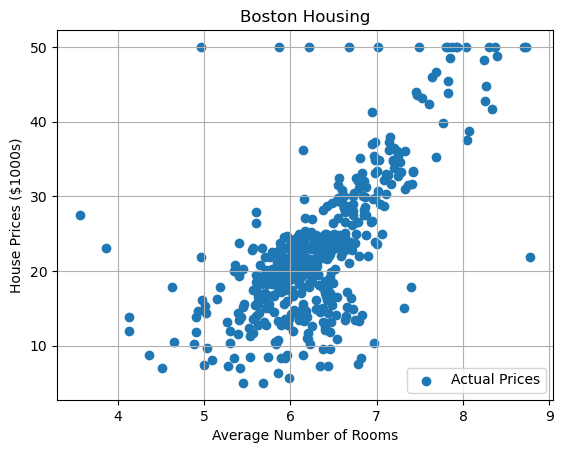

Train set shape: (354, 1) (354, 1)
Validation set shape: (75, 1) (75, 1)
Test set shape: (77, 1) (77, 1)


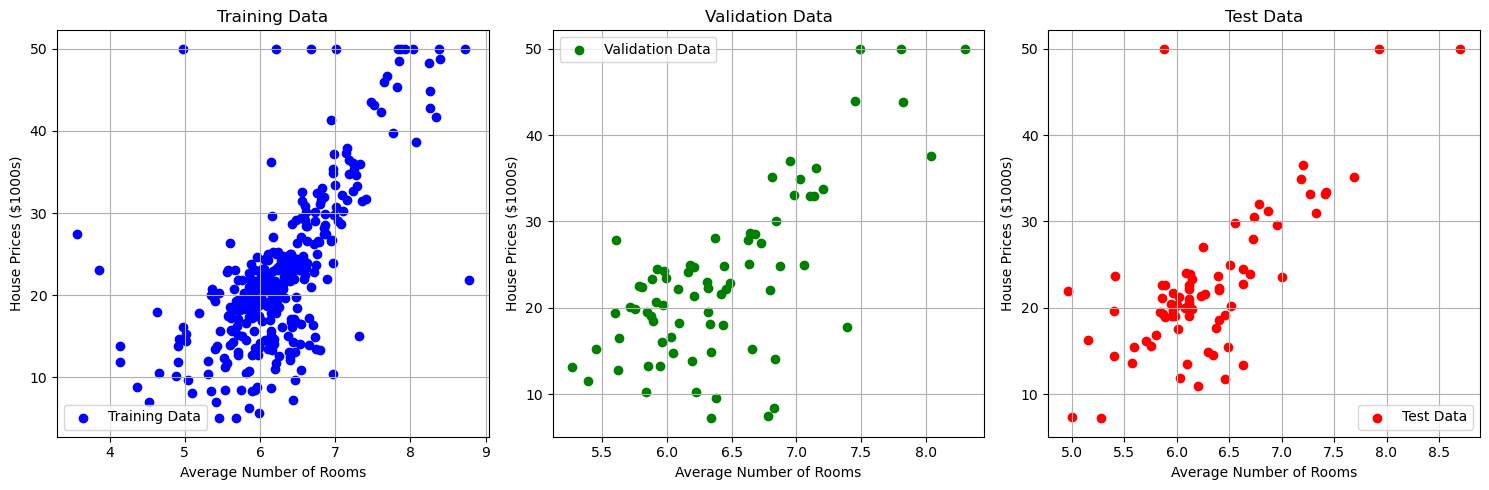

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# Step 1: Data Loading
def load_boston_data(url):
    with urllib.request.urlopen(url) as response:
        lines = response.read().decode('utf-8').split('\n')
    data = np.genfromtxt(lines, delimiter=',', skip_header=1)
    X = data[:, 5].reshape(-1, 1)  # average number of rooms (RM)
    y = data[:, -1]  # median value of owner-occupied homes (MEDV)
    return X, y

url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'  # URL to the Boston Housing dataset
X, y = load_boston_data(url)

plt.scatter(X, y, label='Actual Prices')
plt.xlabel('Average Number of Rooms')
plt.ylabel('House Prices ($1000s)')
plt.title('Boston Housing')
plt.legend()
plt.grid(True)
plt.show()

# Step 2: Splitting the dataset
def split_data(X, y, train_size=0.7, valid_size=0.15, test_size=0.15, shuffle=True, seed=None):
    if shuffle:
        np.random.seed(seed)
        num_samples = len(X)
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        X = X[indices]
        y = y[indices]
    
    num_samples = len(X)
    num_train = int(train_size * num_samples)
    num_valid = int(valid_size * num_samples)
    
    X_train, y_train = X[:num_train], y[:num_train]
    X_valid, y_valid = X[num_train:num_train+num_valid], y[num_train:num_train+num_valid]
    X_test, y_test = X[num_train+num_valid:], y[num_train+num_valid:]
    y_train = y_train.reshape(-1, 1)
    y_valid = y_valid.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)
    return X_train, y_train, X_valid, y_valid, X_test, y_test

# Step 3: Splitting the dataset with shuffling
X_train, y_train, X_valid, y_valid, X_test, y_test = split_data(X, y, train_size=0.7, valid_size=0.15, test_size=0.15, shuffle=True, seed=42)

# Printing the shapes of the splits
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Test set shape:", X_test.shape, y_test.shape)




# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plotting training data
axs[0].scatter(X_train, y_train, label='Training Data', color='blue')
axs[0].set_title('Training Data')
axs[0].set_xlabel('Average Number of Rooms')
axs[0].set_ylabel('House Prices ($1000s)')
axs[0].legend()
axs[0].grid(True)

# Plotting validation data
axs[1].scatter(X_valid, y_valid, label='Validation Data', color='green')
axs[1].set_title('Validation Data')
axs[1].set_xlabel('Average Number of Rooms')
axs[1].set_ylabel('House Prices ($1000s)')
axs[1].legend()
axs[1].grid(True)

# Plotting test data
axs[2].scatter(X_test, y_test, label='Test Data', color='red')
axs[2].set_title('Test Data')
axs[2].set_xlabel('Average Number of Rooms')
axs[2].set_ylabel('House Prices ($1000s)')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

## Solution

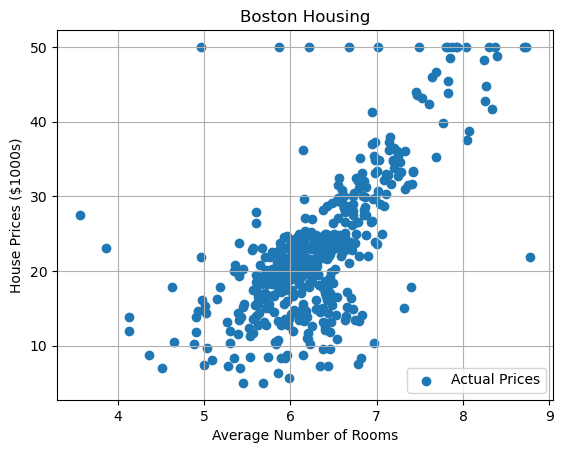

Train set shape: (354, 1) (354, 1)
Validation set shape: (75, 1) (75, 1)
Test set shape: (77, 1) (77, 1)
(354, 1)
Epoch 0, Error: 33.61155058840894
Epoch 1000, Error: 27.8304604902438
Epoch 2000, Error: 26.569913168814548
Epoch 3000, Error: 25.596036013198823
Epoch 4000, Error: 24.84363529161797
Epoch 5000, Error: 24.26234344944774
Epoch 6000, Error: 23.813247381246587
Epoch 7000, Error: 23.46628349178145
Epoch 8000, Error: 23.198225165029747
Epoch 9000, Error: 22.991127917383327


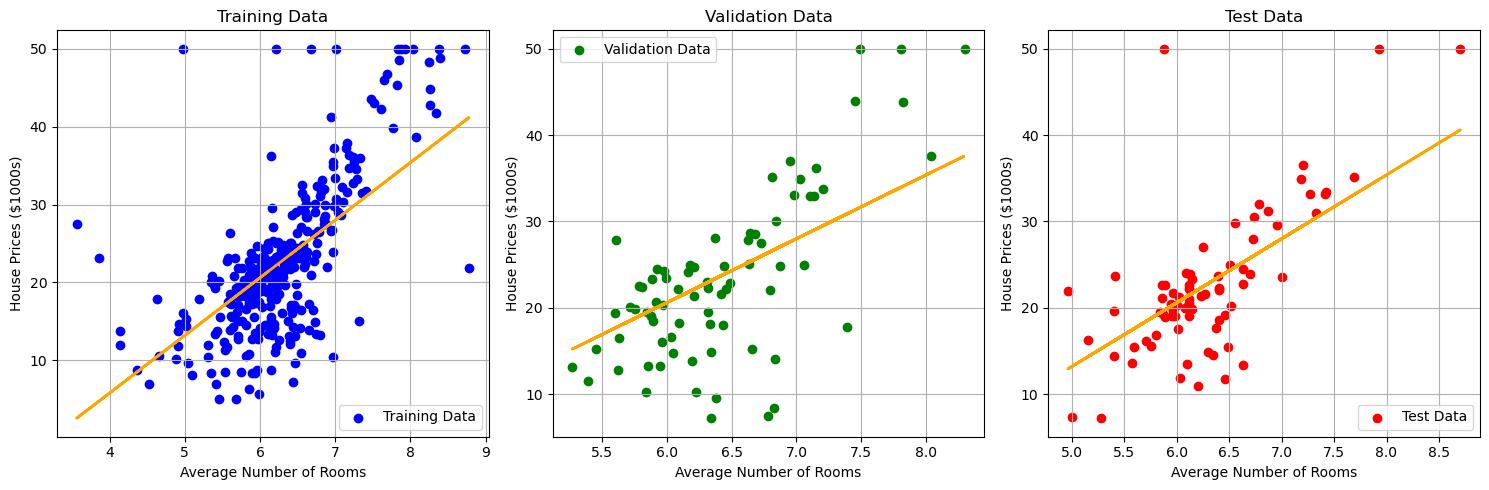

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# Step 1: Data Loading
def load_boston_data(url):
    with urllib.request.urlopen(url) as response:
        lines = response.read().decode('utf-8').split('\n')
    data = np.genfromtxt(lines, delimiter=',', skip_header=1)
    X = data[:, 5].reshape(-1, 1)  # average number of rooms (RM)
    y = data[:, -1]  # median value of owner-occupied homes (MEDV)
    return X, y

url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'  # URL to the Boston Housing dataset
X, y = load_boston_data(url)

plt.scatter(X, y, label='Actual Prices')
plt.xlabel('Average Number of Rooms')
plt.ylabel('House Prices ($1000s)')
plt.title('Boston Housing')
plt.legend()
plt.grid(True)
plt.show()

# Step 2: Splitting the dataset
def split_data(X, y, train_size=0.7, valid_size=0.15, test_size=0.15, shuffle=True, seed=None):
    if shuffle:
        np.random.seed(seed)
        num_samples = len(X)
        indices = np.arange(num_samples)
        np.random.shuffle(indices)
        X = X[indices]
        y = y[indices]
    
    num_samples = len(X)
    num_train = int(train_size * num_samples)
    num_valid = int(valid_size * num_samples)
    
    X_train, y_train = X[:num_train], y[:num_train]
    X_valid, y_valid = X[num_train:num_train+num_valid], y[num_train:num_train+num_valid]
    X_test, y_test = X[num_train+num_valid:], y[num_train+num_valid:]
    y_train = y_train.reshape(-1, 1)
    y_valid = y_valid.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)
    return X_train, y_train, X_valid, y_valid, X_test, y_test

# Step 3: Splitting the dataset with shuffling
X_train, y_train, X_valid, y_valid, X_test, y_test = split_data(X, y, train_size=0.7, valid_size=0.15, test_size=0.15, shuffle=True, seed=42)

# Printing the shapes of the splits
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Test set shape:", X_test.shape, y_test.shape)


###############################################

# Define the SingleNeuronModel class with np.matmul for matrix multiplication
class SingleNeuronModel:
    def __init__(self, input_dim, output_dim):
        self.W = np.random.randn(input_dim, output_dim) 
        self.b = np.zeros((output_dim,))
    
    def relu(self, h):
       return np.maximum(0, h)
 
    def relu_derivative(self, h):
       return np.where(h > 0, 1, 0)
    
    def linear_output(self, X):
        # Use np.matmul for matrix multiplication
        linear_output = np.matmul(X, self.W) + self.b
        return linear_output

    def predict(self,X):
         return self.relu(self.linear_output(X))
    
    def train(self, X, y_t, learning_rate, epochs):
        for epoch in range(epochs):
            h=self.linear_output(X)
            y_pred = self.relu(h)
            delta = y_pred - y_t
            dW = np.matmul(X.T, delta * self.relu_derivative(h))  / X.shape[0]
            db = np.sum(delta * self.relu_derivative(h), axis=0) / X.shape[0]
            self.W -= learning_rate * dW
            self.b -= learning_rate * db
            if epoch % 1000 == 0:
                error = np.mean(0.5 * (delta ** 2))
                print(f"Epoch {epoch}, Error: {error}")


print(y_train.shape)

# # Instantiate and train the model
model = SingleNeuronModel(1, 1)  # OR function: 2 inputs, 1 output

# # Train the model on the entire dataset
model.train(X_train, y_train, learning_rate=0.01, epochs=10000)


#############################

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plotting training data
axs[0].scatter(X_train, y_train, label='Training Data', color='blue')
axs[0].set_title('Training Data')
axs[0].set_xlabel('Average Number of Rooms')
axs[0].set_ylabel('House Prices ($1000s)')
axs[0].legend()
axs[0].grid(True)

# Plotting validation data
axs[1].scatter(X_valid, y_valid, label='Validation Data', color='green')
axs[1].set_title('Validation Data')
axs[1].set_xlabel('Average Number of Rooms')
axs[1].set_ylabel('House Prices ($1000s)')
axs[1].legend()
axs[1].grid(True)

# Plotting test data
axs[2].scatter(X_test, y_test, label='Test Data', color='red')
axs[2].set_title('Test Data')
axs[2].set_xlabel('Average Number of Rooms')
axs[2].set_ylabel('House Prices ($1000s)')
axs[2].legend()
axs[2].grid(True)

# Plotting the model
# Plot the final model on the training data
axs[0].plot(X_train, model.predict(X_train), color='orange', linewidth=2, label='Final Model')
# Plot the final model on the validation data
axs[1].plot(X_valid, model.predict(X_valid), color='orange', linewidth=2, label='Final Model')
# Plot the final model on the test data
axs[2].plot(X_test, model.predict(X_test), color='orange', linewidth=2, label='Final Model')


plt.tight_layout()
plt.show()
